[[0.52 0.48 0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]]
['Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap']
[[0.392 0.375 0.233]
 [0.576 0.212 0.212]
 [0.576 0.212 0.212]
 [0.212 0.212 0.576]
 [0.212 0.576 0.212]]


C:\Users\reals\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


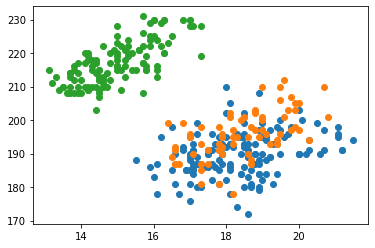

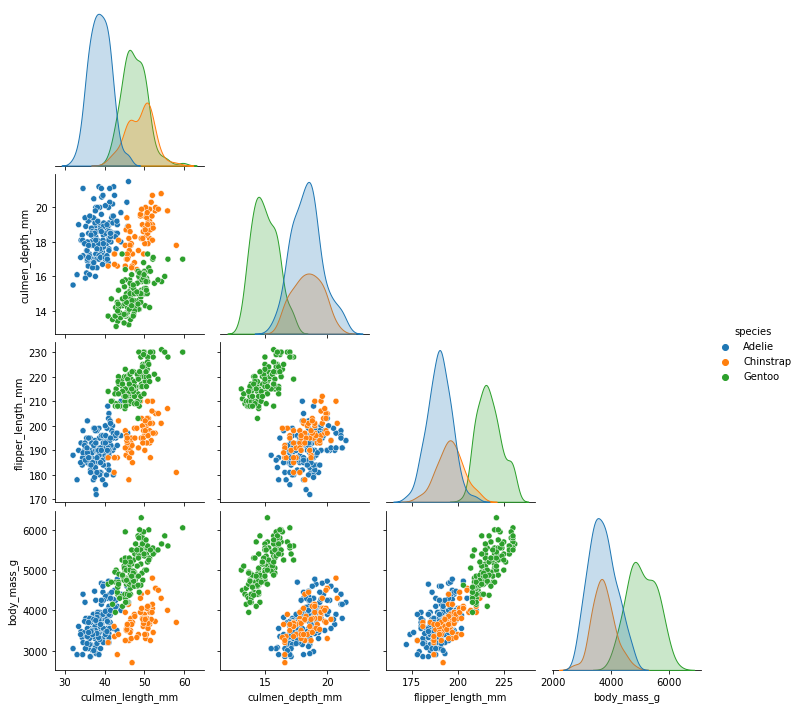

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import softmax
from sklearn.model_selection import train_test_split


# penguins_lter = pd.read_csv('penguins_lter.csv')
penguins_size = pd.read_csv('penguins_size.csv')
#'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'
penguins_size_na = penguins_size[(penguins_size['culmen_length_mm'].isnull() | penguins_size['culmen_depth_mm'].isnull() |penguins_size['flipper_length_mm'].isnull() |penguins_size['body_mass_g'].isnull() |penguins_size['sex'].isnull())]
penguins_size_dropna = penguins_size.dropna()
X = penguins_size_dropna.drop(penguins_size_dropna[['species', 'island', 'sex']], axis=1)
y = penguins_size_dropna['species']

train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(train_input, train_target)
lr_decision = lr.predict_proba(test_input[:5])
print(np.round(lr_decision, decimals=2))
print(lr.predict(test_input[:5]))
lr_proba = softmax(lr_decision, axis=1)
print(np.round(lr_proba, decimals=3))

plt.scatter(penguins_size.loc[penguins_size.species == 'Adelie']['culmen_depth_mm'], penguins_size.loc[penguins_size.species == 'Adelie']['flipper_length_mm'])
plt.scatter(penguins_size.loc[penguins_size.species == 'Chinstrap']['culmen_depth_mm'], penguins_size.loc[penguins_size.species == 'Chinstrap']['flipper_length_mm'])
plt.scatter(penguins_size.loc[penguins_size.species == 'Gentoo']['culmen_depth_mm'], penguins_size.loc[penguins_size.species == 'Gentoo']['flipper_length_mm'])
plt.show()

sns.pairplot(penguins_size, hue='species', corner=True)
plt.show()